In [5]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Matplotlib created a temporary cache directory at /tmp/matplotlib-c230ylh4 because the default path (/home/lfi/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [37]:
def plot_scope_benchmarks(file_paths: dict[str, str]):
    """
    Plots SCOPe benchmark sensitivity up to the first false positive for multiple .rocx files.

    Parameters:
        file_paths (dict): Dictionary mapping display names to .rocx file paths.
    """

    plt.rcParams["figure.dpi"] = 300
    fig, axes = plt.subplots(1, 4, figsize=(18, 5))
    fig.suptitle("SCOPe Benchmark on mdCATH", fontsize=16)

    titles = [
        "C - Class",
        "A - Architecture",
        "T - Topology",
        "H - Homologous Superfamily",
    ]
    y_labels = ["CLASS", "ARCH", "TOP", "HOM"]

    colors = ["black", "blue", "red", "orange", "green", "purple"]

    for idx, (name, path) in enumerate(file_paths.items()):
        df = pd.read_csv(path, sep="\t")

        fraction_queries = np.linspace(0, 1, len(df))

        for i, ylabel in enumerate(y_labels):
            df_sorted = df.sort_values(by=ylabel, ascending=False)
            axes[i].plot(
                fraction_queries,
                df_sorted[ylabel],
                label=name,
                color=colors[idx % len(colors)],
                linewidth=0.8,
                linestyle="-",
            )
            axes[i].set_xlabel("Fraction of Queries")
            axes[i].set_ylabel("Sensitivity up to the 1st FP")
            axes[i].set_title(f"{titles[i]}")
            axes[i].grid()

    axes[-1].legend(title="Method", loc="upper right", fontsize=8)

    plt.tight_layout()
    plt.show()

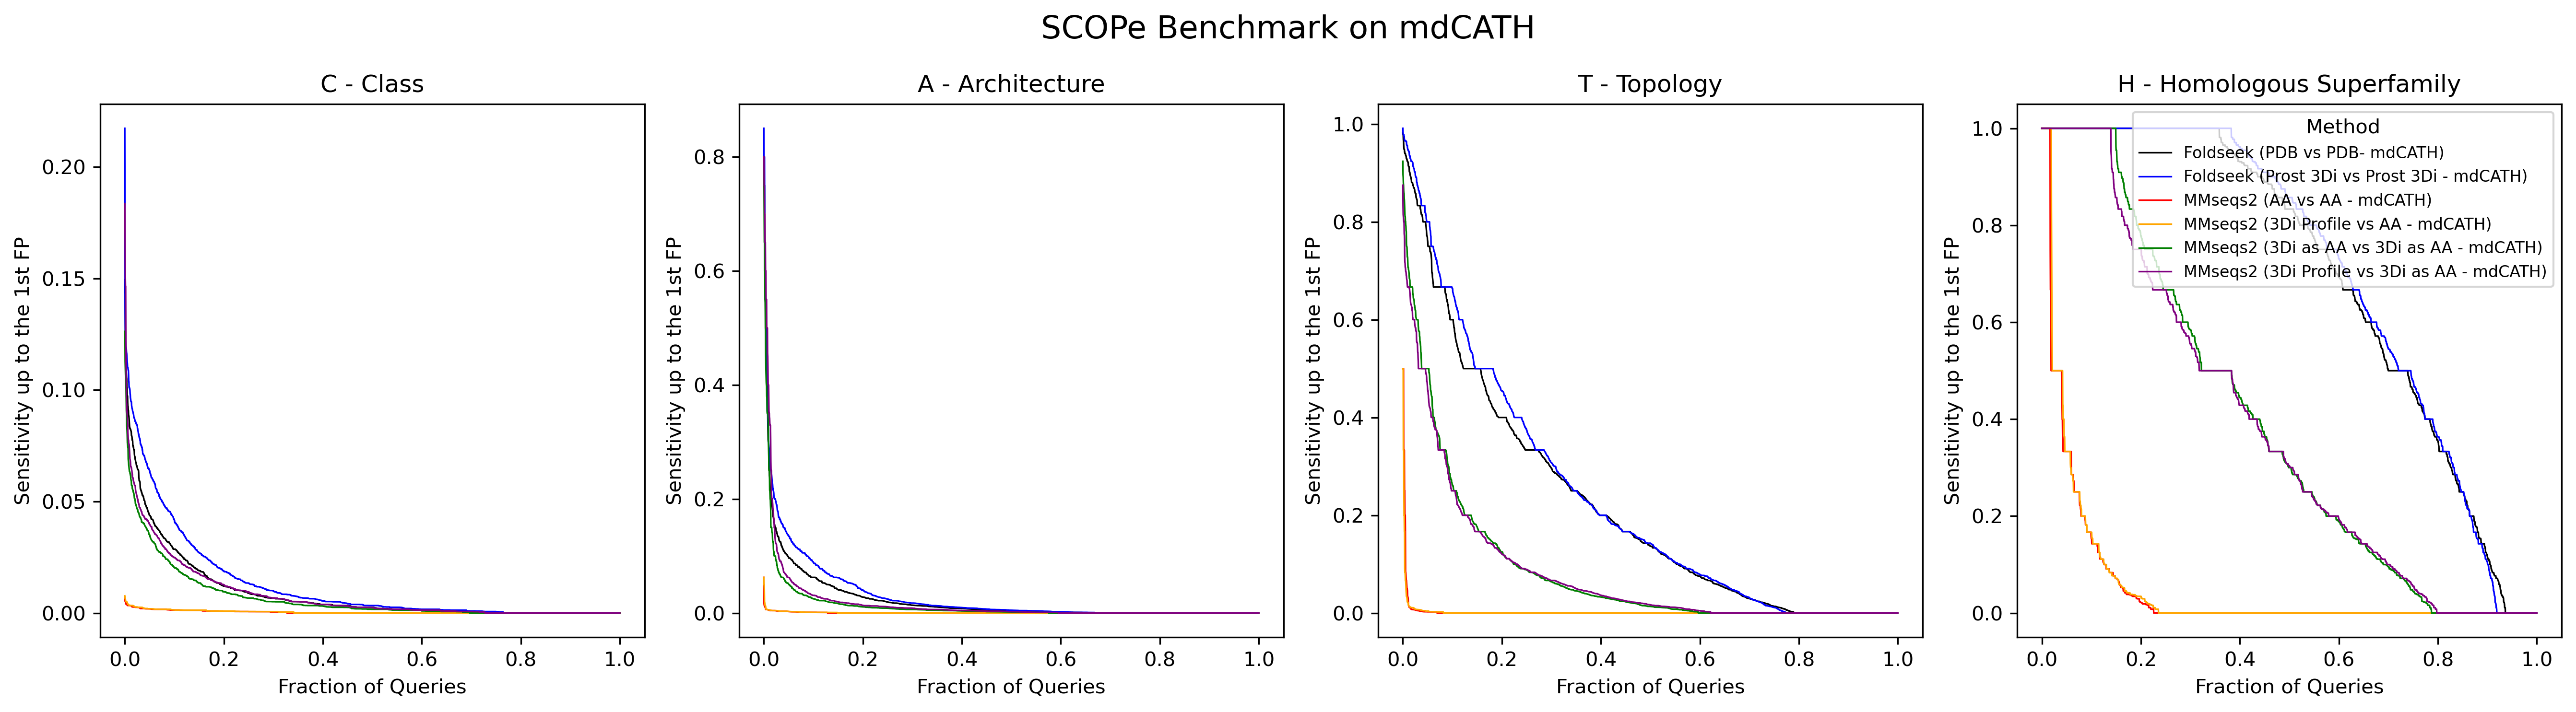

In [51]:
paths = {
    "Foldseek (PDB vs PDB- mdCATH)": "./data/rocx/foldseek_mdcath_pdb_vs_pdb.rocx",
    "Foldseek (Prost 3Di vs Prost 3Di - mdCATH)": "./data/rocx/foldseek_mdcath_3Di_prost_vs_3Di_prost.rocx",
    "MMseqs2 (AA vs AA - mdCATH)": "./data/rocx/mmseqs_mdcath_aa_vs_aa.rocx",
    "MMseqs2 (3Di Profile vs AA - mdCATH)": "./data/rocx/mmseqs_mdcath_profile_vs_aa.rocx",
    "MMseqs2 (3Di as AA vs 3Di as AA - mdCATH)": "./data/rocx/mmseqs_3Di_as_aa_vs_3Di_as_aa_benchmark.rocx",
    "MMseqs2 (3Di Profile vs 3Di as AA - mdCATH)": "./data/rocx/mmseqs_mdcath_profile_vs_3Di_as_aa_benchmark.rocx",
}

plot_scope_benchmarks(paths)